In [ ]:
import os
import matplotlib.pyplot as plt

from ultralytics import YOLO


image 1/1 /Users/Lab/rebar-works/yolo-intersect-detection/data/test/images/20250620_102446_jpg.rf.5f0144bd2e3a5c7fc82374b11d418e94.jpg: 640x640 18 intersections, 117.1ms
Speed: 3.7ms preprocess, 117.1ms inference, 12.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /Users/Lab/rebar-works/yolo-intersect-detection/data/test/images/20250620_114145_jpg.rf.56b93052d19ad6a1d388e252be80b444.jpg: 640x640 6 intersections, 92.4ms
Speed: 1.2ms preprocess, 92.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /Users/Lab/rebar-works/yolo-intersect-detection/data/test/images/20250613_203702_jpg.rf.8a0542000d31483bd3869d89a7ec7bc0.jpg: 640x640 20 intersections, 80.2ms
Speed: 0.9ms preprocess, 80.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /Users/Lab/rebar-works/yolo-intersect-detection/data/test/images/20250613_204223_jpg.rf.2fb2b043c0bcb9e574bea1a8d652c0c5.jpg: 640x640 20 intersections, 76.9ms
Speed: 1.3ms preprocess, 76

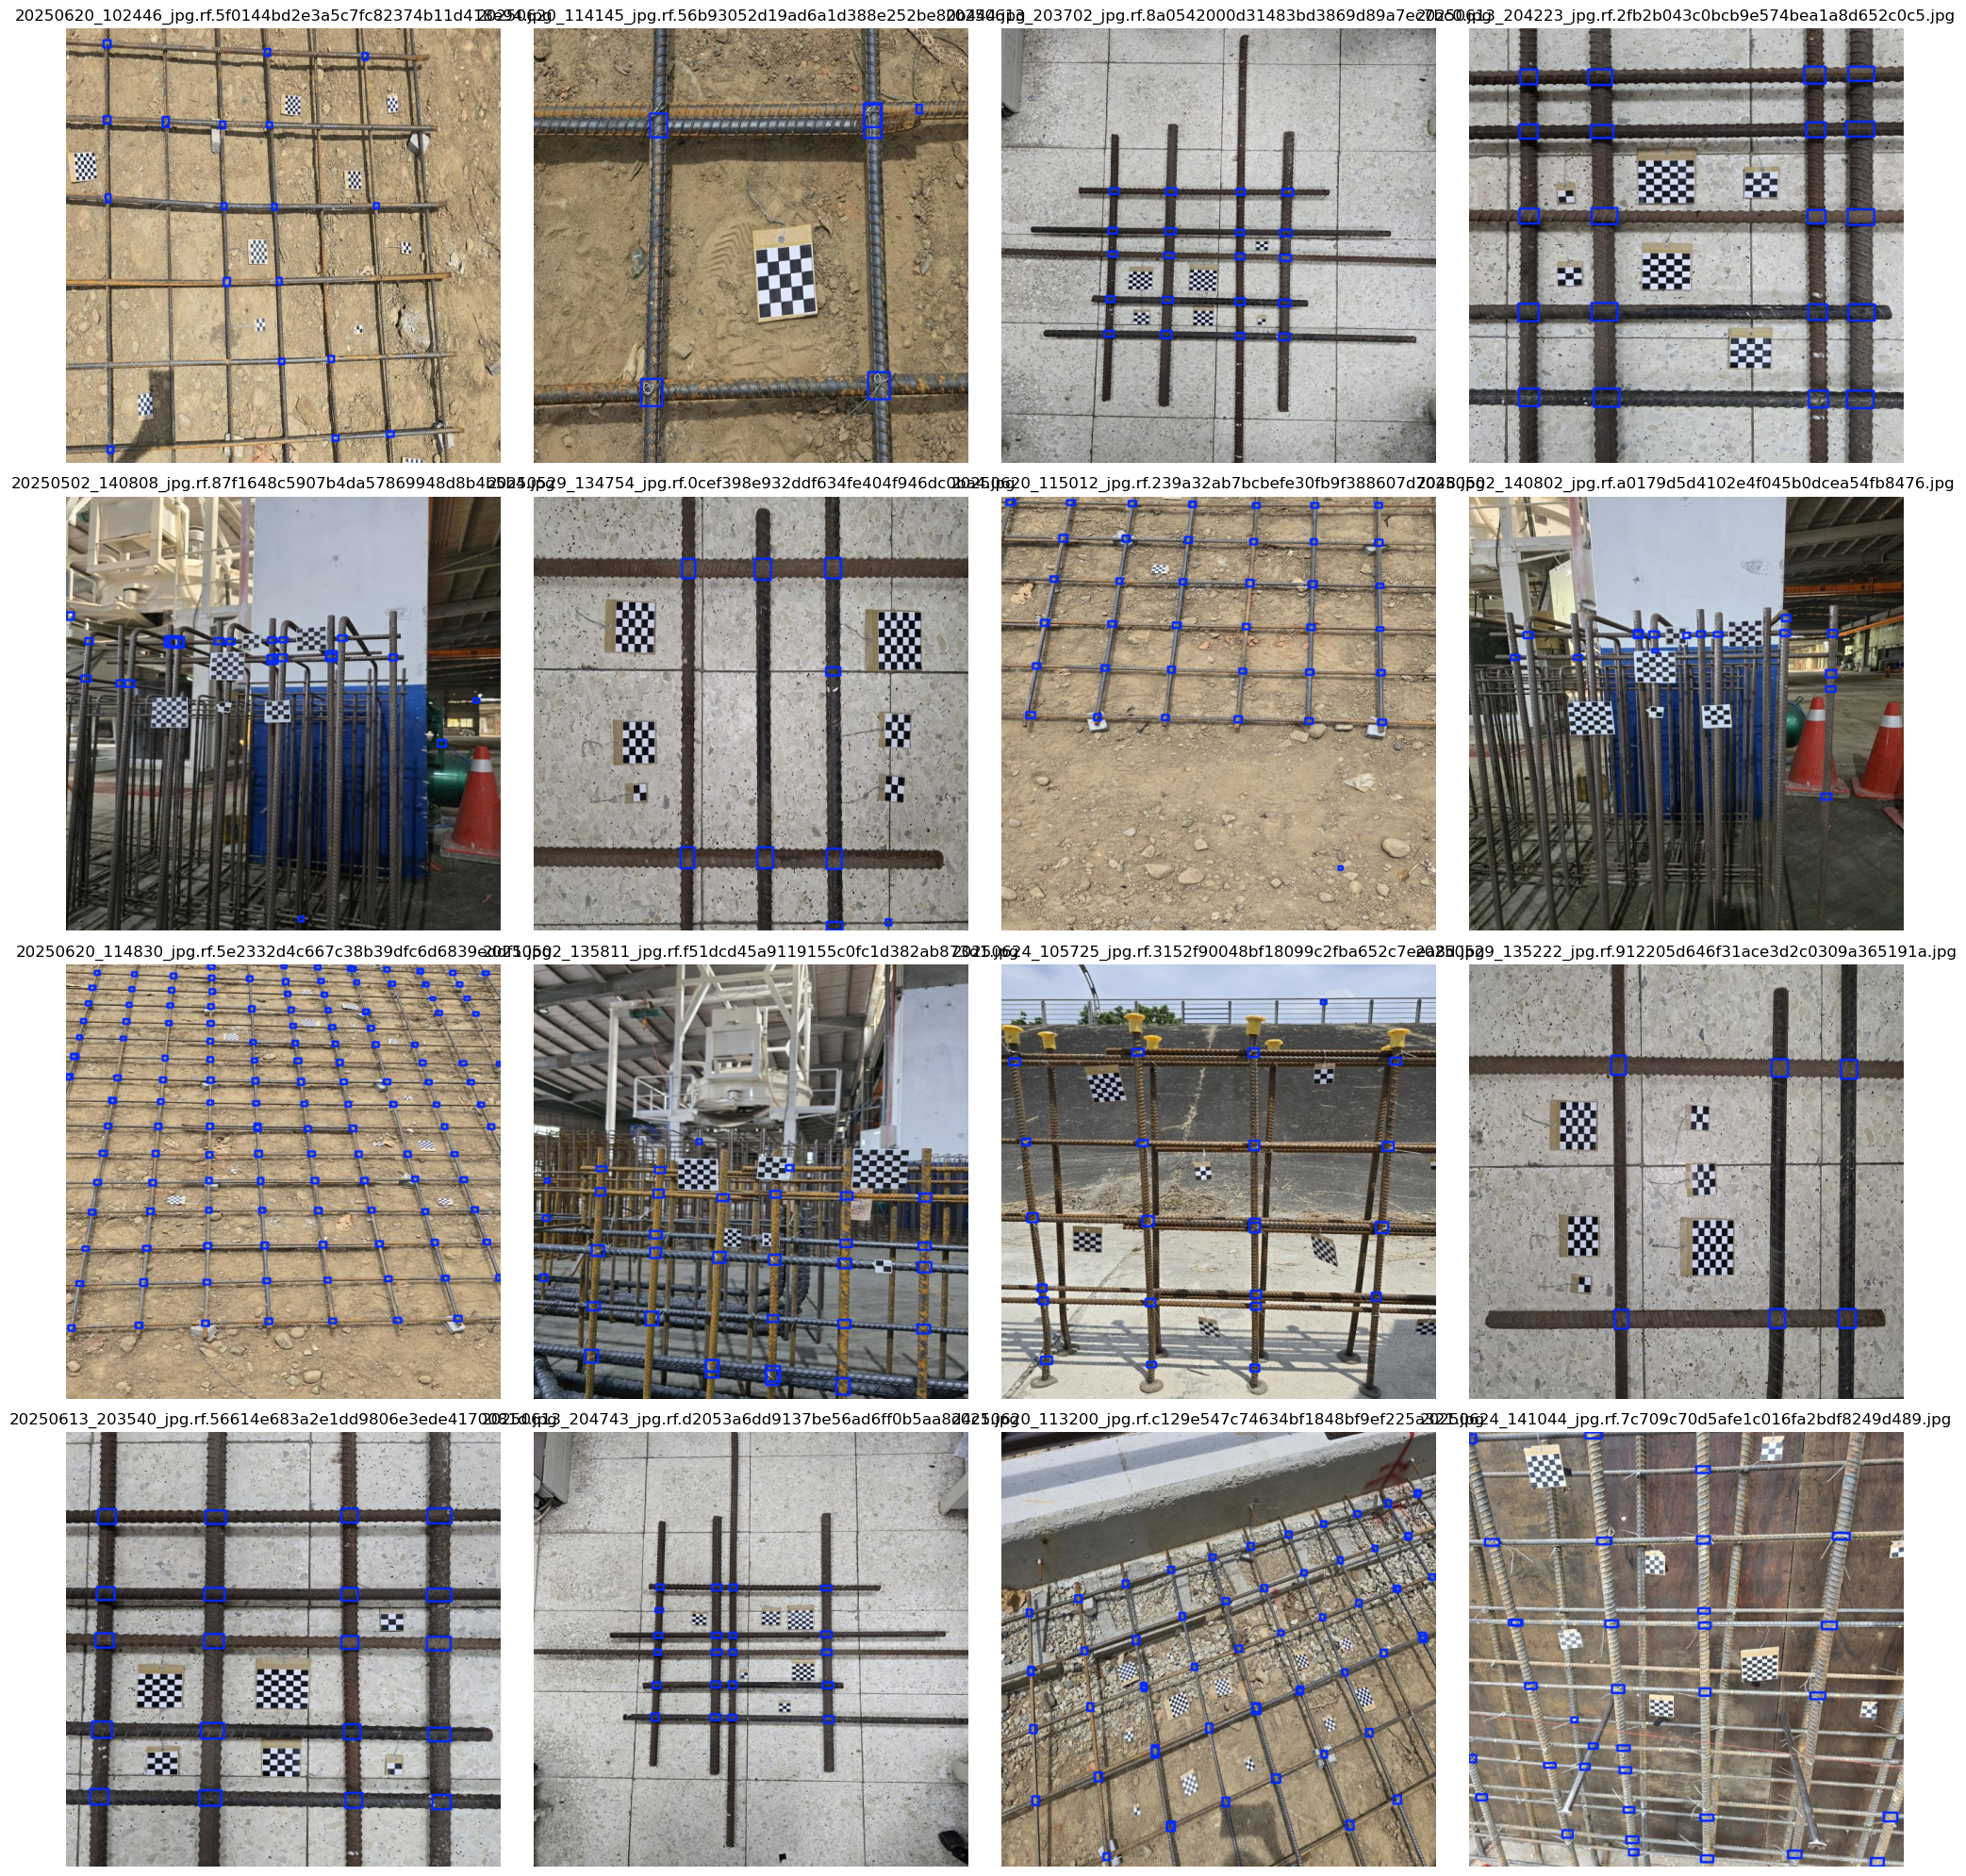

In [20]:
# Load YOLO model
model = YOLO('runs/detect/tune/weights/best.pt') 

# Define path to your images
image_folder = "data/test/images"  
image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Calculate grid size for all images
num_images = len(image_files)
cols = 4  # 4 columns
rows = (num_images + cols - 1) // cols  # Calculate rows needed

# Process and display results
fig, axes = plt.subplots(rows, cols, figsize=(20, 5*rows))

# Handle case where we have only one row
if rows == 1:
    axes = axes.reshape(1, -1)
axes = axes.ravel()

for i, image_file in enumerate(image_files):
    # Load image
    image_path = os.path.join(image_folder, image_file)
    
    # Run YOLO detection
    results = model(image_path)
    # print(f"Processed {image_file}: {results[0].boxes}")
    
    # Plot results on image
    annotated_img = results[0].plot(
        labels=False,
        conf=False,
    )
    
    # Convert BGR to RGB for matplotlib
    annotated_img_rgb = annotated_img[:, :, ::-1]
    
    # Display
    axes[i].imshow(annotated_img_rgb)
    axes[i].set_title(f"{image_file}")
    axes[i].axis('off')

# Hide unused subplots
for i in range(num_images, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
results = model.val(data='data/data.yaml', split='test')

Ultralytics 8.3.173 🚀 Python-3.12.7 torch-2.7.1 CPU (Apple M1)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 328.2±70.2 MB/s, size: 88.9 KB)


val: Scanning /Users/Lab/rebar-works/yolo-intersect-detection/data/test/labels... 16 images, 0 backgrounds, 0 corrupt: 100%|██████████| 16/16 [00:00<00:00, 1655.09it/s]

val: New cache created: /Users/Lab/rebar-works/yolo-intersect-detection/data/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.19s/it]


                   all         16        485      0.818      0.666       0.74      0.309
Speed: 2.4ms preprocess, 191.4ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/val5
